# Convolutional Sentiment Classifier

classifying IMDB reviews by their sentiment with a ConvNet.

#### Load dependencies 

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D,SpatialDropout1D, GlobalAveragePooling1D
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Set Hyperparameter 

In [2]:
output_dir = './model_output/conv'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_dense = 256
dropout = 0.2

n_conv = 256
k_conv = 3    #kernel

#### Load data 

In [7]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

#### Preprocess data 

In [8]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Design NN Architecture

In [9]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

#### configure model 

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train! 

In [14]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 18s 701us/step - loss: 0.4656 - acc: 0.7610 - val_loss: 0.3152 - val_acc: 0.8691
Epoch 2/4
25000/25000 [==============================] - 10s 389us/step - loss: 0.2550 - acc: 0.9006 - val_loss: 0.2784 - val_acc: 0.8837
Epoch 3/4
25000/25000 [==============================] - 10s 389us/step - loss: 0.2130 - acc: 0.9166 - val_loss: 0.2798 - val_acc: 0.8834
Epoch 4/4
25000/25000 [==============================] - 10s 386us/step - loss: 0.1883 - acc: 0.9290 - val_loss: 0.2936 - val_acc: 0.8817


#### Evaluate 

In [15]:
model.load_weights(output_dir+'/weights.01.hdf5')

In [16]:
y_hat = model.predict_proba(x_valid)

In [17]:
y_hat[0]

array([0.22778839], dtype=float32)

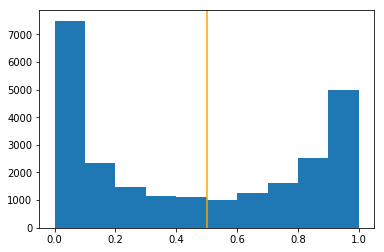

In [18]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [19]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [20]:
"{:0.2f}".format(pct_auc)

'94.41'